# Задание 1

1. Импортируйте файл «Данные для ДЗ 5 Корреляции.csv».
2. Постройте гистограммы распределения для рядов *PHYSICS* и *BLOOD* и сделайте визуальный вывод о нормальности распределения данных.
3. Постройте *scatterplot* этих двух величин и сделайте визуальный вывод о корреляции между ними.
4. Создайте функцию ***proxi_ranges***, которая берет на вход
    - Ряд 1 (***r1***)
    - Ряд 2 (***r2***)
    - Уровень значимости ***alpha*** (имеет дефолтное значение = 5%)
    
    Данная функция выполняет следующие действия:
    
    - Вычисляет дисперсии рядов ***r1*** и ***r2*** и их ковариацию (с помощью функции *cov* из библиотеки *numpy*)
    - Принтит эти результаты с подписями (в user-friendly манере).
    - Вычисляет корреляцию Пирсона (*pearsonr* из библиотеки *scipy.stats*) и корреляцию Спирмена (*spearmanr* из библиотеки *scipy.stats*) рядов ***r1*** и ***r2***, а также *****p_value* этих корреляций.
    - Принтит результаты корреляционного анализа: корреляция равна нулю, если p_value больше ***alpha*** . В противном случае принтит, является ли корреляция слабой (меньше 0.3), средней (от 0.3 до 0.7) или сильной (больше 0.7) (как для корреляции Пирсона, так и для корреляции Спирмена отдельно).
    - Функция не обладает return.
5. Примените функцию ***proxi_ranges*** к рядам *PHYSICS* и *BLOOD* из csv-файла.

In [2]:
import pandas as pd

In [3]:
df_corr = pd.read_csv('Данные для дз5 Корреляции.csv', sep=';')
df_corr

,PHYSICS,BLOOD
0,48,132
1,138,52
2,156,77
3,167,64
4,105,89
...,...,...
1430,174,52
1431,6,135
1432,131,58
1433,133,72


In [4]:
from matplotlib import pyplot as plt

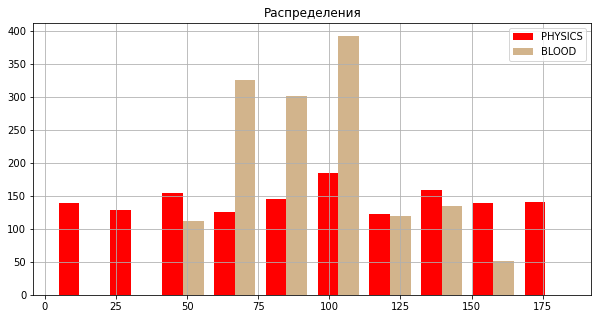

In [5]:
plt.figure(figsize=(10,5))
plt.title('Распределения')
colors = ['red', 'tan']
labels = ['PHYSICS','BLOOD']
plt.hist(df_corr,   color=colors, label=labels)
plt.legend(prop={'size': 10})
plt.grid()
plt.show()

C:\Users\USMAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


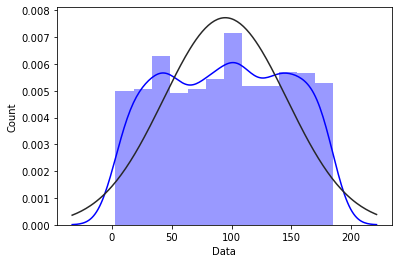

C:\Users\USMAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


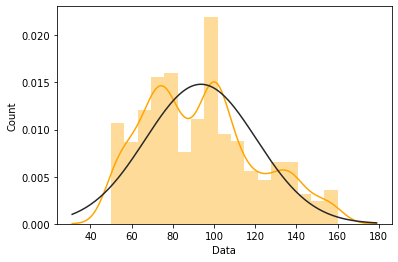

In [7]:
import seaborn as sns
from scipy.stats import norm


ax1 = sns.distplot(df_corr['PHYSICS'], color='blue', fit=norm)
ax1.set(xlabel='Data', ylabel='Count')
plt.show()
ax2 = sns.distplot(df_corr['BLOOD'], color='orange', fit=norm)
ax2.set(xlabel='Data', ylabel='Count')
plt.show()

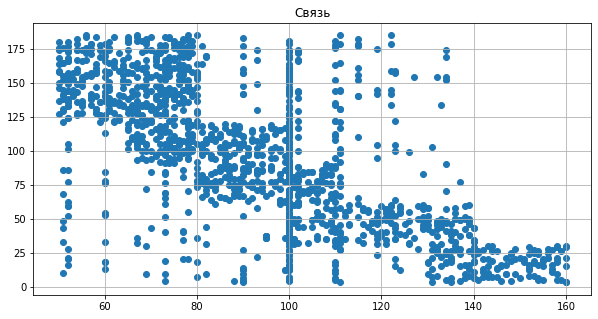

In [8]:
plt.figure(figsize=(10,5))
plt.title('Связь')
plt.scatter(df_corr['BLOOD'],df_corr['PHYSICS'])
plt.grid()
plt.show()

In [9]:
import numpy as np
from scipy import stats as st

In [10]:
def proxi_ranges(r1, r2, alpha = 0.05):
    cov = np.cov(r1, r2)
    
    print('Ковариация: {:.2f}'.format(cov[0][1]))
    print('Дисперсия для BLOOD: {:.2f}'.format(cov[0][0]))
    print('Дисперсия для PHYSICS: {:.2f}'.format(cov[1][1]))
    
    pearson_v, pearson_p = st.pearsonr(r1, r2)
    spearman_v, spearman_p = st.spearmanr(r1, r2)
    
    if pearson_p < alpha:
        if abs(pearson_v) < 0.3:
            pearson_resolution = 'слабая'
        elif abs(pearson_v) < 0.7:
            pearson_resolution = 'средняя'
        else: pearson_resolution = 'сильная'
        
        print ('Корреляция Пирсона =', round(pearson_v,2), f'{pearson_resolution}')
            
    else: print('Корреляция Пирсона равна нулю')
        
     
    if spearman_p < alpha:
        if abs(spearman_v) < 0.3:
            spearman_resolution = 'слабая'
        elif abs(spearman_v) < 0.7:
            spearman_resolution = 'средняя'
        else: spearman_resolution = 'сильная'
        
        print ('Корреляция Спирмана =', round(spearman_v,2), f'{pearson_resolution}')
            
    else: print('Корреляция Спирмана равна нулю')   
        
    print (cov)

In [11]:
proxi_ranges(df_corr['BLOOD'],df_corr['PHYSICS'])

Ковариация: -921.47
Дисперсия для BLOOD: 726.64
Дисперсия для PHYSICS: 2669.46
Корреляция Пирсона = -0.66 средняя
Корреляция Спирмана = -0.65 средняя
[[ 726.63514256 -921.46692325]
 [-921.46692325 2669.4622843 ]]


### Задание 2

1. Импортируйте файл «Данные для ДЗ 5 Манн-Уитни.csv».
2. Постройте гистограмму рядов *BLOOD1* и *BLOOD2*.
3. Создайте функцию **mann_whitney_func**, которая берет на вход: 
    - Ряд 1 (***r1***)
    - Ряд 2 (***r2***)
    - Уровень значимости ***alpha*** (имеет дефолтное значение = 5%)
    
    Данная функция выполняет следующие действия:
    
    - Вычисляет значение статистики Манна — Уитни и p_value нулевой гипотезы теста Манна-Уитни. Значение статистики записывается во внутреннюю переменную ***s***, а *p_value* - во внутреннюю переменную ***p***.
    - Принт результата в зависимости от соотношения p_value и alpha («Распределения (не) равны»).
    - Возвращает (в *return*) — внутренние переменные ***s*** и ***p***.
    
4. Примените эту функцию к рядам *BLOOD1* и *BLOOD2* из csv-файла.
5. Примените к этим рядам также t-test для сравнения средних. Для этого используйте функцию ***test_calc*** из домашнего задания №4.
6. Сделайте выводы по результатам теста Стьюдента и теста Манна-Уитни.

In [12]:
df_mw = pd.read_csv('Данные для дз5 Манн-Уитни.csv', sep = ';')

In [13]:
df_mw

,BLOOD1,BLOOD2
0,66,140.0
1,92,140.0
2,75,78.0
3,98,79.0
4,84,80.0
...,...,...
684,81,NaN
685,121,NaN
686,98,NaN
687,96,NaN


In [14]:
df_mw = df_mw.dropna()

In [15]:
df_mw

,BLOOD1,BLOOD2
0,66,140.0
1,92,140.0
2,75,78.0
3,98,79.0
4,84,80.0
...,...,...
600,95,61.0
601,61,61.0
602,63,60.0
603,55,60.0


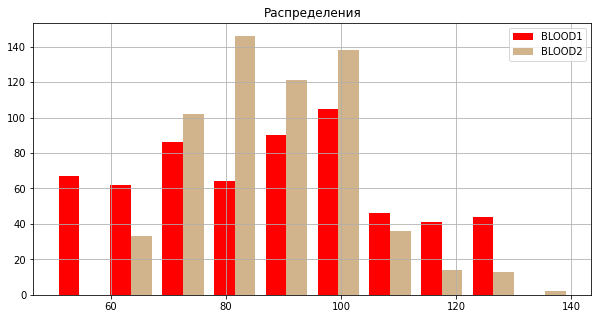

In [16]:
plt.figure(figsize=(10,5))
plt.title('Распределения')
colors = ['red', 'tan']
labels = ['BLOOD1','BLOOD2']
plt.hist(df_mw,   color=colors, label=labels)
plt.legend(prop={'size': 10})
plt.grid()
plt.show()

In [17]:
def mann_whitney_func(r1, r2, alpha = 0.05):
    
    s, p_value = st.mannwhitneyu(r1,r2)
    
    if p_value < alpha:
        print('распределения не равны')
    else: print('распределения равны')
    
    return s, p_value

In [18]:
mann_whitney_func(df_mw['BLOOD1'],df_mw['BLOOD2'])

распределения равны


(178857.0, 0.49411579709672515)

In [19]:
def test_calc(r1, r2, alpha=0.05):
    s, p_value = st.ttest_ind(r1, r2)
    
    if p_value < alpha:
        print('распределения не равны')
    else: print('распределения равны')
    
    return s, p_value

In [20]:
test_calc(df_mw['BLOOD1'],df_mw['BLOOD2'])

распределения равны


(-0.6398988386814893, 0.5223597081606046)

На основании результатов теста Стьюдента и теста Манна-Уитни делаем одинаковый вывод о равенстве распределений